# This notebook is insanely beautiful

## Import packages

In [1]:
import pandas as pd
import numpy as np
import os

## Import data

In [4]:
def extract_data(file_name, file_path):
    !kaggle competitions download titanic -f $file_name -p $file_path --force
    
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
extract_data('train.csv', raw_data_path)
extract_data('test.csv', raw_data_path)


  0%|          | 0.00/59.8k [00:00<?, ?B/s]
100%|##########| 59.8k/59.8k [00:00<00:00, 6.30MB/s]



  0%|          | 0.00/28.0k [00:00<?, ?B/s]
100%|##########| 28.0k/28.0k [00:00<00:00, 1.65MB/s]


In [5]:
train_file = os.path.join(raw_data_path, 'train.csv')
test_file = os.path.join(raw_data_path, 'test.csv')

In [7]:
train_data = pd.read_csv(train_file, index_col = 'PassengerId')
test_data = pd.read_csv(test_file, index_col = 'PassengerId')

In [8]:
type(train_data)

pandas.core.frame.DataFrame

In [9]:
type(test_data)

pandas.core.frame.DataFrame

## Basic Structure

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [14]:
test_data['Survived'] = -123
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-123
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-123
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-123
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-123
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-123


In [15]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data = pd.concat((test_data, train_data), axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [18]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-123,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-123,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-123,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-123,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-123,3101298


In [19]:
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
887,27.0,NaN,S,13.00,"Montvila, Rev. Juozas",0,2,male,0,0,211536
888,19.0,B42,S,30.00,"Graham, Miss. Margaret Edith",0,1,female,0,1,112053
889,NaN,NaN,S,23.45,"Johnston, Miss. Catherine Helen ""Carrie""",2,3,female,1,0,W./C. 6607
890,26.0,C148,C,30.00,"Behr, Mr. Karl Howell",0,1,male,0,1,111369
891,32.0,NaN,Q,7.75,"Dooley, Mr. Patrick",0,3,male,0,0,370376


In [25]:
data.Name.head()

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [24]:
data['Name'].head()

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [23]:
data[['Name', 'Age']].head()

,Name,Age
PassengerId,,
892,"Kelly, Mr. James",34.5
893,"Wilkes, Mrs. James (Ellen Needs)",47.0
894,"Myles, Mr. Thomas Francis",62.0
895,"Wirz, Mr. Albert",27.0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0


In [27]:
data.loc[5:10, ]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [28]:
data.loc[5:10, 'Age':'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [29]:
data.loc[5:10, ['Age', 'Name', 'Sex']]

,Age,Name,Sex
PassengerId,,,
5,35.0,"Allen, Mr. William Henry",male
6,NaN,"Moran, Mr. James",male
7,54.0,"McCarthy, Mr. Timothy J",male
8,2.0,"Palsson, Master. Gosta Leonard",male
9,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
10,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",female


In [45]:
data.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
897,9.2250,"Svensson, Mr. Johan Cervin",0,3,male
898,7.6292,"Connolly, Miss. Kate",0,3,female
899,29.0000,"Caldwell, Mr. Albert Francis",1,2,male
900,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,3,female
901,24.1500,"Davies, Mr. John Samuel",0,3,male


In [52]:
#Finding the no of male passengers in the dataset
male_passengers = data.loc[data.Sex == 'male']
print('Number of male passengers = {}'.format(len(male_passengers)))

Number of male passengers = 843


In [57]:
#Finding the no of male passengers in first class in the dataset
male_passengers_in_first_class = data.loc[(data.Sex=='male') & (data.Pclass == 1)]
print('Number of male passengers in first class = {}'.format(len(male_passengers_in_first_class)))

Number of male passengers in first class = 179


## Summary Statistics

In [58]:
data.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-39.016043
std,14.413493,51.758668,0.865560,0.837836,1.041658,57.546927
min,0.170000,0.000000,0.000000,1.000000,0.000000,-123.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-123.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


## Centrality measures (Mean, Median)

In [81]:
print("Mean fare = {0}".format(round(data.Fare.mean(), 2)))
print("Median fare = {0}".format(round(data.Fare.median(), 2)))

Mean fare = 33.3
Median fare = 14.45


## Spread measures (Range, Variance, Std, Deviation)

In [ ]:
print("Min fare = {}".format(round(data.Fare.min(), 2)))
print("Max fare = {}".format(round(data.Fare.max(), 2)))
print("Range of fare = {}".format(round(data.Fare.max() - data.Fare.min(), 2)))
print("25 percentile of fare = {}".format(data.Fare.quantile(.25)))
print("50 percentile of fare = {}".format(data.Fare.quantile(.5)))
print("75 percentile of fare = {}".format(data.Fare.quantile(.75)))
print("Variance of fare = {}".format(round(data.Fare.var(), 2)))
print("Std dev of fare = {}".format(round(data.Fare.std(), 2)))

In [98]:
%matplotlib inline

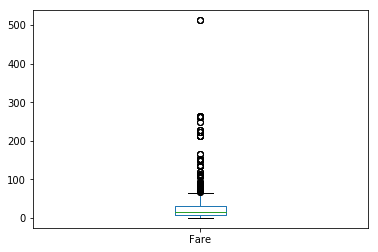

In [99]:
data.Fare.plot(kind = 'box')

## Summary Statistics for categorical functions (Count and Proportion)

In [101]:
data.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-39.016043,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,57.546927,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-123.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-123.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [106]:
data.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [107]:
data['Sex'].value_counts(normalize = 'True')

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [109]:
data[data.Survived != -123].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [112]:
data[data.Survived!=-123].Survived.value_counts(normalize='True')

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [111]:
data.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [113]:
data.Pclass.value_counts(normalize = 'True')

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

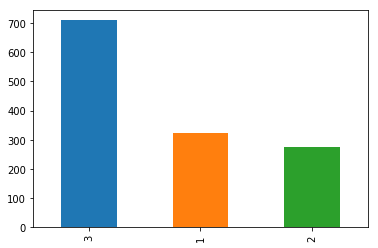

In [122]:
data.Pclass.value_counts().plot(kind = 'bar')

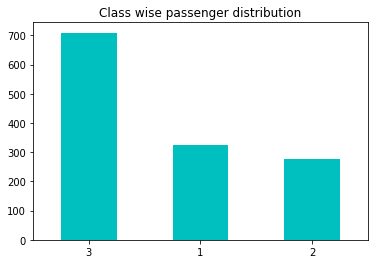

In [123]:
data.Pclass.value_counts().plot(kind = 'bar', rot = 0, title = 'Class wise passenger distribution', color = 'c');

## Distributions

## Univariant distribution

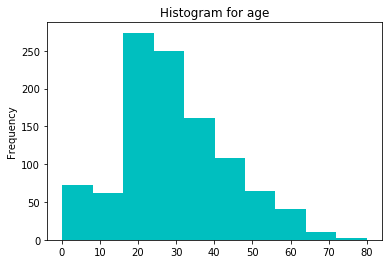

In [127]:
data.Age.plot(kind = 'hist', title = 'Histogram for age', color = 'c');

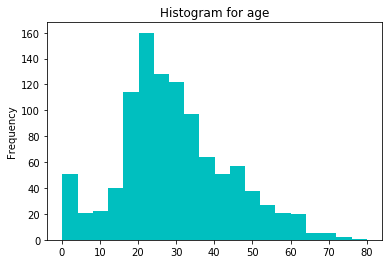

In [146]:
data.Age.plot(kind = 'hist', title = 'Histogram for age', color = 'c', bins = 20);

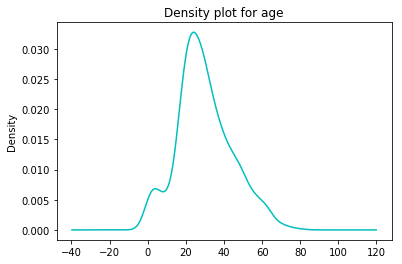

In [148]:
data.Age.plot(kind = 'kde', title = 'Density plot for age', color = 'c');

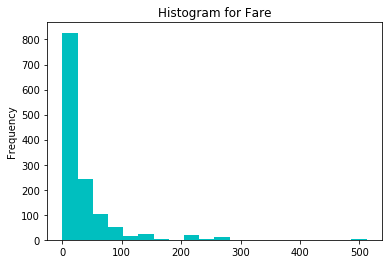

In [159]:
data.Fare.plot(kind = 'hist', title = 'Histogram for Fare', color = 'c', bins = 20);

In [156]:
print("Skewness of age = {}".format(data.Age.skew()))
print("Skewness of Fare = {}".format(data.Fare.skew()))

Skewness of age = 0.40767455974362266
Skewness of Fare = 4.367709134122921


## Bivariant distribution

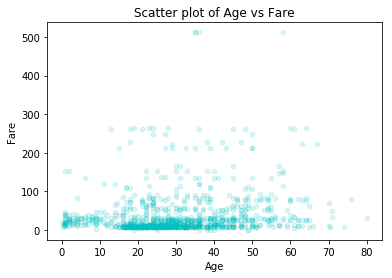

In [169]:
data.plot(kind = 'scatter', x = 'Age', y = 'Fare', title = 'Scatter plot of Age vs Fare', color = 'c', alpha = 0.15)

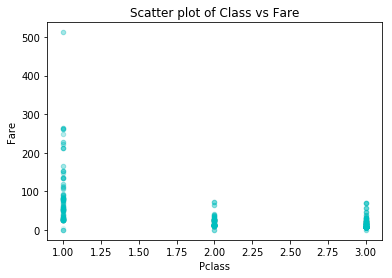

In [170]:
data.plot(kind ='scatter', x = 'Pclass', y = 'Fare', title = 'Scatter plot of Class vs Fare', color = 'c', alpha = 0.1);

## Creating groups

In [172]:
data.groupby('Sex').Age.mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [173]:
data.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [175]:
data.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [180]:
data.groupby('Pclass').Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [181]:
data.groupby('Pclass')['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [195]:
data.groupby('Pclass').agg({'Fare':'mean', 'Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


## **Aggregations is too beautiful to handle, look at the power of pandas.
## Aggregations function basically helps in aggregating the both the centrality and spread measures in such a beautiful way

In [191]:
aggregations = {
    'Fare':{
        'mean_fare' : 'mean',
        'median_fare' : 'median',
        'max_fare' : max,
        'min_fare' : np.min
    },
    'Age':{
        'median_age' : 'median',
        'min_age' : np.min,
        'max_age' : np.max,
        'range_age' : lambda x : max(x) - min(x)
    }
}

In [194]:
data.groupby('Sex').agg(aggregations)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_fare median_fare  max_fare min_fare median_age min_age max_age   
Sex                                                                           
female  46.198097     23.0000  512.3292     6.75       27.0    0.17    76.0   
male    26.154601     11.8875  512.3292     0.00       28.0    0.33    80.0   

                  
       range_age  
Sex               
female     75.83  
male       79.67

In [199]:
data.groupby(['Sex', 'Pclass']).agg(aggregations)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age          \
                mean_fare median_fare  max_fare min_fare median_age min_age   
Sex    Pclass                                                                 
female 1       109.412385    80.92915  512.3292    25.70       36.0    2.00   
       2        23.234827    23.00000   65.0000    10.50       28.0    0.92   
       3        15.324250    10.48960   69.5500     6.75       22.0    0.17   
male   1        69.888385    49.50420  512.3292     0.00       42.0    0.92   
       2        19.904946    13.00000   73.5000     0.00       29.5    0.67   
       3        12.415462     7.89580   69.5500     0.00       25.0    0.33   

                                 
              max_age range_age  
Sex    Pclass                    
female 1         76.0     74.00  
       2         60.0     59.08  
       3         63.0     62.83  
male   1         80.0     79.08  
       2         70.0     69.33  
       3         74.0     73.67

In [201]:
data.groupby(['Sex', 'Pclass']).Fare.median()

Sex     Pclass
female  1         80.92915
        2         23.00000
        3         10.48960
male    1         49.50420
        2         13.00000
        3          7.89580
Name: Fare, dtype: float64

## Crosstab

In [208]:
pd.crosstab(data.Sex, data.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


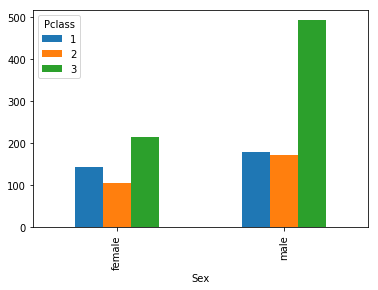

In [212]:
pd.crosstab(data.Sex, data.Pclass).plot(kind='bar');

## Pivot

In [216]:
data.pivot_table(index = 'Sex', columns = 'Pclass', values = 'Age', aggfunc = 'mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [217]:
##Same thing can be achieved using groupby and mean like this
data.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [218]:
data.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data munging : Handling missing values

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Repairing Embarked

In [229]:
data[data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [231]:
data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [233]:
pd.crosstab(data[data['Survived']!=-123].Survived, data[data['Survived']!=-123].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [235]:
data.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [238]:
data.Embarked.fillna('C', inplace = True)

In [241]:
data[data.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Repairing Fare

In [244]:
data[data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-123,3701


In [ ]:
## We are coming back to this

In [256]:
anish_median_fare = data[(data['Embarked'] == 'S') & (data['Pclass'] == 3)].Fare.median()

In [258]:
median_fare = data.loc[(data.Pclass == 3) & (data.Embarked == 'S'), 'Fare'].median()

In [259]:
data.Fare.fillna(median_fare, inplace=True)

In [260]:
data[data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Repairing Age

In [267]:
pd.options.display.max_rows = 15

In [268]:
data[data.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
902,NaN,NaN,S,7.8958,"Ilieff, Mr. Ylio",0,3,male,0,-123,349220
914,NaN,NaN,S,31.6833,"Flegenheim, Mrs. Alfred (Antoinette)",0,1,female,0,-123,PC 17598
921,NaN,NaN,C,21.6792,"Samaan, Mr. Elias",0,3,male,2,-123,2662
925,NaN,NaN,S,23.4500,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",2,3,female,1,-123,W./C. 6607
928,NaN,NaN,S,8.0500,"Roth, Miss. Sarah A",0,3,female,0,-123,342712
931,NaN,NaN,S,56.4958,"Hee, Mr. Ling",0,3,male,0,-123,1601
933,NaN,D34,S,26.5500,"Franklin, Mr. Thomas Parham",0,1,male,0,-123,113778
...,...,...,...,...,...,...,...,...,...,...,...
847,NaN,NaN,S,69.5500,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343


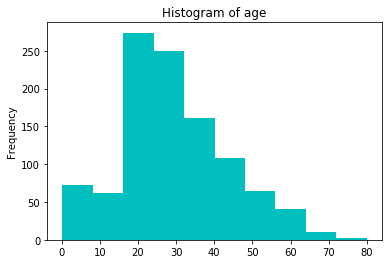

In [270]:
data.Age.plot(kind = 'hist', color = 'c', title = 'Histogram of age');

In [272]:
round(data.Age.mean(), 2)

29.88

In [274]:
data.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

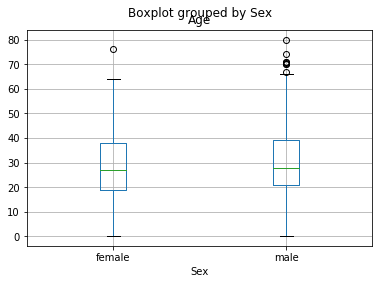

In [276]:
data[data.Age.notnull()].boxplot('Age', 'Sex');

## **Take some time and admire the beauty of transform() :) This is magic!!

In [289]:
data.iloc[:7,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-123,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-123,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-123,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-123,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-123,3101298
897,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,3,male,0,-123,7538
898,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,3,female,0,-123,330972


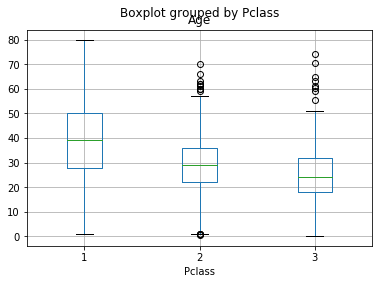

In [294]:
data[data.Age.notnull()].boxplot('Age', 'Pclass');

In [296]:
data.Name

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                      Svensson, Mr. Johan Cervin
898                            Connolly, Miss. Kate
                           ...                     
885                          Sutehall, Mr. Henry Jr
886            Rice, Mrs. William (Margaret Norton)
887                           Montvila, Rev. Juozas
888                    Graham, Miss. Margaret Edith
889        Johnston, Miss. Catherine Helen "Carrie"
890                           Behr, Mr. Karl Howell
891                             Dooley, Mr. Patrick
Name: Name, Length: 1309, dtype: object

In [307]:
def GetTitle(name):
    title_group = {
        'mr': 'Mr',
        'mrs': 'Mrs',
        'miss': 'Miss',
        'master': 'Master', 
        'ms': 'Mrs',
        'col': 'Officer',
        'rev': 'Sir',
        'dr': 'Officer',
        'dona': 'Lady',
        'don': 'Sir',
        'mme': 'Mrs',
        'major': 'Officer',
        'lady': 'Lady',
        'sir': 'Sir',
        'mlle': 'Miss',
        'capt': 'Officer',
        'the countess': 'Lady',
        'jonkheer': 'Sir',
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [308]:
data['Title'] = data.Name.map(lambda x: GetTitle(x))

In [309]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-123,330911,Mr
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-123,363272,Mrs
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-123,240276,Mr
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-123,315154,Mr
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-123,3101298,Mrs


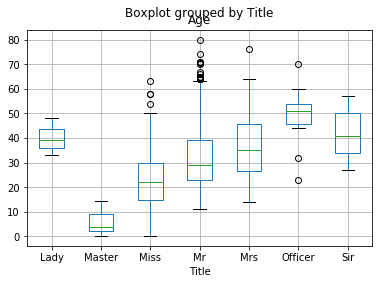

In [311]:
data[data.Age.notnull()].boxplot('Age', 'Title');

In [318]:
data.groupby('Title').Age.median()

Title
Lady       39.0
Master      4.0
Miss       22.0
Mr         29.0
Mrs        35.0
Officer    51.0
Sir        41.0
Name: Age, dtype: float64

In [312]:
title_age_median = data.groupby('Title').Age.transform('median')
data.Age.fillna(title_age_median, inplace = True)